In [8]:
import re
import pandas as pd
import numpy as np
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from textblob import TextBlob
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from collections import Counter

In [9]:
data = pd.read_json('data.json')

In [10]:
df = pd.DataFrame(data)
pd.options.display.max_colwidth = 100

In [11]:
#Transforming columns into numerical features
df['no_of_photos'] = df['photos'].apply(len)
df['no_of_features'] = df['features'].apply(len)
df['interest_num'] = df['interest_level'].map({'low': 0, 'medium': 1, 'high': 2})
df["n_words"] = df["description"].apply(lambda x: len(x.split(" ")))
df["created"] = pd.to_datetime(df["created"])
df["created_year"] = df["created"].dt.year
df["created_month"] = df["created"].dt.month
df["created_day"] = df["created"].dt.day

In [12]:
df = df.reset_index()
df.head()

,index,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,...,photos,price,street_address,no_of_photos,no_of_features,interest_num,n_words,created_year,created_month,created_day
0,10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Her...,Metropolitan Avenue,[],medium,40.7145,...,"[https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg, https://photos.renth...",3000,792 Metropolitan Avenue,5,0,1,95,2016,6,24
1,10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allowed, Dogs Allowed]",low,40.7947,...,"[https://photos.renthop.com/2/7150865_be3306c5d89c6bfa755c6e89c9ed64d5.jpg, https://photos.renth...",5465,808 Columbus Avenue,11,5,0,9,2016,6,12
2,100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-war building with laundry in the basement and live ...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Floors, Pets Allowed Case by Case]",high,40.7388,...,"[https://photos.renthop.com/2/6887163_de85c427363a2e6d736a5df96d8d5541.jpg, https://photos.renth...",2850,241 W 13 Street,8,4,2,94,2016,4,17
3,100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness room - laundry room -rooftop deck .<br /><br />Lo...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,...,"[https://photos.renthop.com/2/6888711_6e660cee4f508b476568a4b4c1160c20.jpg, https://photos.renth...",3275,333 East 49th Street,3,2,0,80,2016,4,18
4,100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom apartment for rent. Available immediately. Elevat...,West 143rd Street,[Pre-War],low,40.8241,...,"[https://photos.renthop.com/2/6934781_1fa4b41a929865b9a5443fdaf78d0147.jpg, https://photos.renth...",3350,500 West 143rd Street,3,1,0,68,2016,4,28


In [97]:
#Removing outliers from latitute and longitude as we got the scatter plot like this


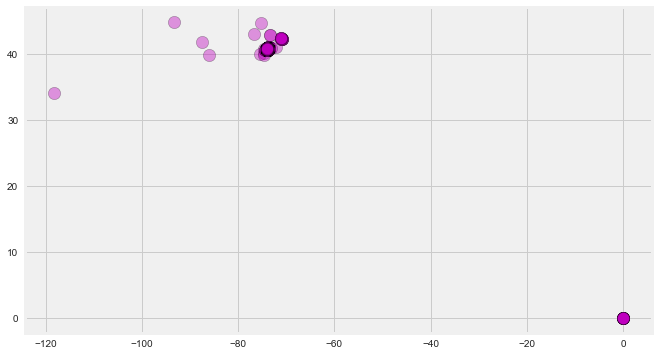

In [98]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
scatter = ax.scatter(df['longitude'], df['latitude'], c='m', edgecolor='k', alpha=.4, s=150)


In [99]:
plt.show(scatter)

In [100]:
# #Removing outliers from latitude and longitude using median and standard deviation

# x1 = df['latitude'].median()
# y1 = df['latitude'].std()

# x2 = df['longitude'].median()
# y2 = df['longitude'].std()

# for i in range(0,len(df)):
#     if (i>x1-2*y1):
#         df['latitude'] == i
#     else:
#         df['latitude'] == 0
        
# for i in range(0,len(df)):
#     if (i>x2 -2*y2):
#         df['longitude'] == i
#     else:
#         df['longitude'] == 0





In [101]:
x = df
latmean = x['latitude'].mean()

lonmean = x['longitude'].mean()

x=x.reset_index()

In [102]:
faa=[]
for i in range(0,len(x)):
    faa.append(np.sqrt(((x['latitude'][i] - latmean) * (x['latitude'][i] - latmean) ) + ((x['longitude'][i] - lonmean) * (x['longitude'][i] - lonmean)) ))

In [103]:
x['distance'] = faa

In [104]:
x = x[x['distance'] < 0.5] 


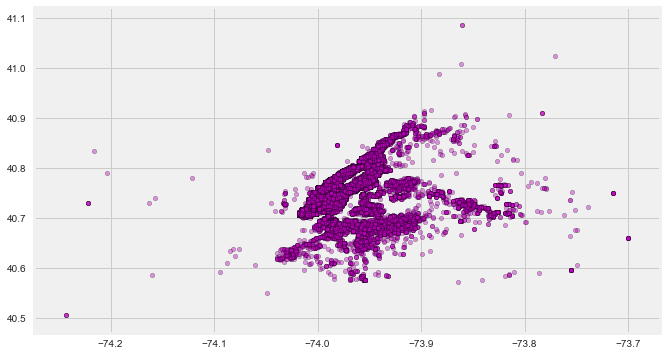

In [105]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
scatter = ax.scatter(x['longitude'], x['latitude'], c='m', edgecolor='k', alpha=.4, s=20)
plt.show()

In [107]:
x['unqlatlng'] = (x['latitude']+90)*180+x['longitude']

In [108]:
# K Means Cluster
ncomp = 5
km = KMeans(ncomp, random_state=1)
km.fit(x['unqlatlng'].reshape(-1,1))
x['labels'] = km.labels_


/Users/akshaygade/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [109]:
cols = sns.color_palette("RdBu", n_colors=ncomp, desat=.5)

In [110]:
X = x[['latitude','longitude']].values

In [111]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i+5, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

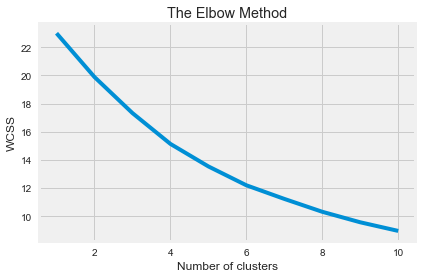

In [112]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [113]:
#Visualizing the clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [114]:
y_kmeans

array([3, 1, 0, ..., 0, 0, 2], dtype=int32)

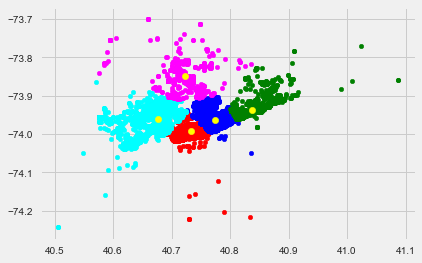

In [115]:
import matplotlib.style as style
style.use('fivethirtyeight')
fig.set_size_inches(10, 6)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'yellow', label = 'Centroids')


# Text Analysis

In [516]:
features_list=df.features.tolist()
features_list

[[],
 ['Doorman', 'Elevator', 'Fitness Center', 'Cats Allowed', 'Dogs Allowed'],
 ['Laundry In Building',
  'Dishwasher',
  'Hardwood Floors',
  'Pets Allowed Case by Case'],
 ['Hardwood Floors', 'No Fee'],
 ['Pre-War'],
 [],
 ['prewar',
  'elevator',
  'Dogs Allowed',
  'Cats Allowed',
  'LOWRISE',
  'SIMPLEX',
  'HARDWOOD',
  'No Fee'],
 ['Doorman',
  'Elevator',
  'Pre-War',
  'Terrace',
  'Laundry in Unit',
  'Dishwasher',
  'Hardwood Floors',
  'Outdoor Space'],
 ['Cats Allowed', 'Dogs Allowed', 'Elevator', 'Laundry In Building'],
 ['Dishwasher', 'Hardwood Floors'],
 [],
 ['prewar',
  'dishwasher',
  'HIGHRISE',
  'ROOFDECK',
  'EAT IN KITCHEN',
  'SIMPLEX',
  'HARDWOOD'],
 ['Doorman', 'Elevator', 'Laundry in Building', 'No Fee'],
 ['Swimming Pool',
  'Doorman',
  'Fitness Center',
  'No Fee',
  'Dogs Allowed',
  'Cats Allowed'],
 ['Elevator',
  'Multi-Level',
  'Laundry in Building',
  'Dishwasher',
  'Hardwood Floors'],
 ['Doorman', 'Elevator', 'Fitness Center', 'Laundry in Buil

In [517]:
words = str(features_list).split()

In [518]:
Counter = Counter(words)

In [524]:
most_occur = Counter.most_common(100)
most_occur

[("Allowed',", 27701),
 ("'Laundry", 27147),
 ('in', 25659),
 ("'Hardwood", 21823),
 ("'Dogs", 21430),
 ("'Cats", 20296),
 ("'Elevator',", 20193),
 ("'Dishwasher',", 18552),
 ("Allowed'],", 17956),
 ("Floors',", 17230),
 ("'No", 17091),
 ("Building',", 16549),
 ("Center',", 13047),
 ("'Fitness", 12645),
 ("Fee',", 11560),
 ("'Doorman',", 11062),
 ("Unit',", 9730),
 ("['Doorman',", 9533),
 ("Fee'],", 7208),
 ("Deck',", 6510),
 ("Floors'],", 6303),
 ("'Outdoor", 5371),
 ("Room',", 5309),
 ("Space',", 5010),
 ("'Pre-War',", 4938),
 ("'High", 4865),
 ("['Roof", 4676),
 ("['Elevator',", 4479),
 ('Speed', 4303),
 ("Internet',", 4268),
 ('In', 3461),
 ("['Cats", 3245),
 ('[],', 3217),
 ("['Pre-War',", 2955),
 ("Pool',", 2791),
 ("['Dining", 2711),
 ("Building'],", 2647),
 ("'New", 2604),
 ("['Swimming", 2539),
 ("Space'],", 2513),
 ("'Dining", 2429),
 ("'Terrace',", 2170),
 ("'Balcony',", 2040),
 ("['Laundry", 1972),
 ("'Roof", 1893),
 ('Outdoor', 1804),
 ("['Hardwood", 1729),
 ("'Garden/Pati

# Sentiment Analysis

In [609]:
#Cleaning text data


In [547]:
#Tokenizing sentences usning nltk sent_tokenize

In [620]:
from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
df['tokens'] = df['description'].apply(sent_tokenize)

In [621]:
def sentiment(words):
    polarity = SIA()
    output = []
    for word in words:
        out = polarity.polarity_scores(word)
        output.append(out)
    return pd.DataFrame(output).mean()

In [622]:
df2 = df['tokens'].apply(sentiment)

In [629]:
df2.head()

,compound,neg,neu,pos
0,0.117278,0.005222,0.912111,0.082667
1,NaN,NaN,NaN,NaN
2,0.571375,0.000000,0.798000,0.202000
3,0.305700,0.000000,0.948500,0.051500
4,0.097010,0.039400,0.887800,0.072800


In [671]:
sentiment_data = pd.concat([df2,df['interest_level']],axis=1)
sentiment_data.head()

,compound,neg,neu,pos,interest_level
0,0.117278,0.005222,0.912111,0.082667,medium
1,NaN,NaN,NaN,NaN,low
2,0.571375,0.000000,0.798000,0.202000,high
3,0.305700,0.000000,0.948500,0.051500,low
4,0.097010,0.039400,0.887800,0.072800,low


In [758]:
sns.set(style="darkgrid", palette="pastel", color_codes=True)

ValueError: fivethirtyeight is not a valid palette name

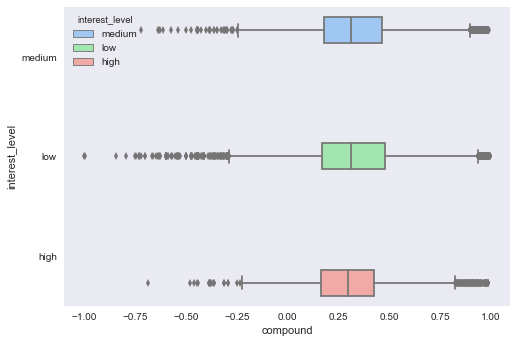

In [753]:
sns.boxplot(x="compound", y="interest_level", hue="interest_level", data=sentiment_data);


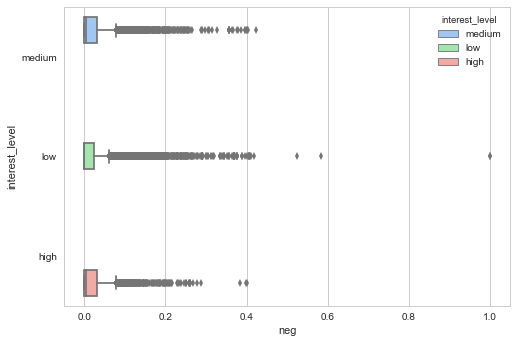

In [667]:
sns.boxplot(x="neg", y="interest_level", hue="interest_level", data=sentiment_data);

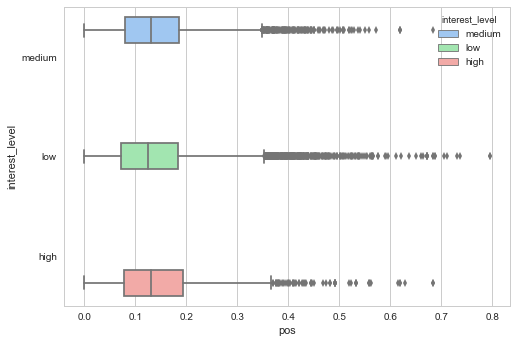

In [668]:
sns.boxplot(x="pos", y="interest_level", hue="interest_level", data=sentiment_data);

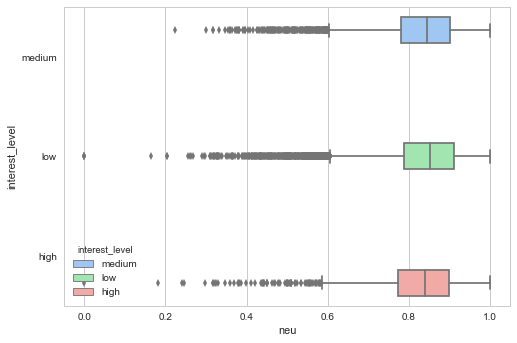

In [669]:
sns.boxplot(x="neu", y="interest_level", hue="interest_level", data=sentiment_data);

In [525]:
from nltk.stem.porter import PorterStemmer 
stemmer =PorterStemmer()
def clean(x):
    regex = re.compile('[^a-zA-Z ]')
    # For user clarity, broken it into three steps
    i = regex.sub(' ', x).lower()
    i = i.split(" ") 
    i= [stemmer.stem(l) for l in i]
    i= " ".join(i) # Keeping words that have length greater than 2
    return i

In [526]:
df['description_new'] = df.description.apply(lambda x: clean(x))
# def stem(x):
#     lol2 = [lemma.lemmatize(word) for word in x if not word in set(stopwords.words('english'))]
#     return lol2
# df['description_new'] = df.description.apply(lambda x: stem(x))

In [ ]:
sns.pairplot(df)

In [48]:
import nltk.stem
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem.porter import PorterStemmer as ps
from nltk.corpus import stopwords

lemma = WordNetLemmatizer()
df.dropna()


,index,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,...,longitude,manager_id,photos,price,street_address,no_of_photos,no_of_features,interest_num,n_words,description_new
0,10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Her...,Metropolitan Avenue,[],medium,40.7145,...,-73.9425,5ba989232d0489da1b5f2c45f6688adc,"[https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg, https://photos.renth...",3000,792 Metropolitan Avenue,5,0,1,95,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Her...
1,10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allowed, Dogs Allowed]",low,40.7947,...,-73.9667,7533621a882f71e25173b27e3139d83d,"[https://photos.renthop.com/2/7150865_be3306c5d89c6bfa755c6e89c9ed64d5.jpg, https://photos.renth...",5465,808 Columbus Avenue,11,5,0,9,
2,100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-war building with laundry in the basement and live ...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Floors, Pets Allowed Case by Case]",high,40.7388,...,-74.0018,d9039c43983f6e564b1482b273bd7b01,"[https://photos.renthop.com/2/6887163_de85c427363a2e6d736a5df96d8d5541.jpg, https://photos.renth...",2850,241 W 13 Street,8,4,2,94,"Top Top West Village location, beautiful Pre-war building with laundry in the basement and live ..."
3,100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness room - laundry room -rooftop deck .<br /><br />Lo...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,...,-73.9677,1067e078446a7897d2da493d2f741316,"[https://photos.renthop.com/2/6888711_6e660cee4f508b476568a4b4c1160c20.jpg, https://photos.renth...",3275,333 East 49th Street,3,2,0,80,Building Amenities - Garage - Garden - fitness room - laundry room -rooftop deck .<br /><br />Lo...
4,100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom apartment for rent. Available immediately. Elevat...,West 143rd Street,[Pre-War],low,40.8241,...,-73.9493,98e13ad4b495b9613cef886d79a6291f,"[https://photos.renthop.com/2/6934781_1fa4b41a929865b9a5443fdaf78d0147.jpg, https://photos.renth...",3350,500 West 143rd Street,3,1,0,68,Beautifully renovated 3 bedroom flex 4 bedroom apartment for rent. Available immediately. Elevat...
5,100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],medium,40.7429,...,-74.0028,b209e2c4384a64cc307c26759ee0c651,"[https://photos.renthop.com/2/6894514_9abb859205a2031a9bc6dc659aa741ea.jpg, https://photos.renth...",7995,350 West 18th Street,5,0,1,9,
6,100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots of natural light. Close to the subway line or a nic...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed, LOWRISE, SIMPLEX, HARDWOOD, No Fee]",low,40.8012,...,-73.9660,01287194f20de51872e81f660def4784,"[https://photos.renthop.com/2/6930771_7e3622b6abca46fea02b39f714850f9b.jpg, https://photos.renth...",3600,210 West 107th Street,10,8,0,87,Stunning unit with a great location and lots of natural light. Close to the subway line or a nic...
7,100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath offers you a brand new kitchen,open to the livin...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry in Unit, Dishwasher, Hardwood Floors, Outdoor Space]",low,40.7427,...,-73.9957,e6472c7237327dd3903b3d6f6a94515a,"[https://photos.renthop.com/2/6867392_b18283f6bc64bf385b4be02e209ccd23.jpg, https://photos.renth...",5645,155 West 21st Street,5,8,0,134,"This huge sunny ,plenty of lights 1 bed/2 bath offers you a brand new kitchen,o

In [48]:
df.description.astype(str)
df["description"] = df["description"].replace('[^A-Za-z]+'," ",regex = True)
df.head()

,index,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,...,photos,price,street_address,no_of_photos,no_of_features,interest_num,n_words,created_year,created_month,created_day
0,10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New Bedroom bath ApartmentEnjoy These Following Apartment Features As You Rent Here Mode...,Metropolitan Avenue,[],medium,40.7145,...,"[https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg, https://photos.renth...",3000,792 Metropolitan Avenue,5,0,1,95,2016,6,24
1,10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allowed, Dogs Allowed]",low,40.7947,...,"[https://photos.renthop.com/2/7150865_be3306c5d89c6bfa755c6e89c9ed64d5.jpg, https://photos.renth...",5465,808 Columbus Avenue,11,5,0,9,2016,6,12
2,100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,Top Top West Village location beautiful Pre war building with laundry in the basement and live i...,W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Floors, Pets Allowed Case by Case]",high,40.7388,...,"[https://photos.renthop.com/2/6887163_de85c427363a2e6d736a5df96d8d5541.jpg, https://photos.renth...",2850,241 W 13 Street,8,4,2,94,2016,4,17
3,100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities Garage Garden fitness room laundry room rooftop deck br br Located in midtown...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,...,"[https://photos.renthop.com/2/6888711_6e660cee4f508b476568a4b4c1160c20.jpg, https://photos.renth...",3275,333 East 49th Street,3,2,0,80,2016,4,18
4,100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated bedroom flex bedroom apartment for rent Available immediately Elevator bui...,West 143rd Street,[Pre-War],low,40.8241,...,"[https://photos.renthop.com/2/6934781_1fa4b41a929865b9a5443fdaf78d0147.jpg, https://photos.renth...",3350,500 West 143rd Street,3,1,0,68,2016,4,28


In [ ]:
#Identifying the most repeated words in the description


In [ ]:
def newtext(x):
    nopunc=x
    nopunc= nopunc.lower()
    nopunc=nopunc.split()
    nopunc=[word for word in nopunc if not word in set(stopwords.words('english'))]
    nopunc=' '.join(nopunc)


In [49]:
#TF IDF

In [1]:
from nltk.stem.snowball import SnowballStemmer


In [2]:
stemmer = SnowballStemmer("english")


In [13]:

def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [15]:
vect = TfidfVectorizer(tokenizer = tokens, stop_words = 'english', ngram_range=(1, 1), min_df = 0.01,lowercase = False)


In [17]:
%time bow = vect.fit_transform(df["description"])


CPU times: user 1min 8s, sys: 435 ms, total: 1min 8s
Wall time: 1min 9s


In [18]:
bow_df = pd.DataFrame(bow)
bow_df.columns = vect.get_feature_names()


ValueError: DataFrame constructor not properly called!

In [19]:
bow_df.head()

NameError: name 'bow_df' is not defined

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [32]:
df['features'].fillna("",inplace=True)
# test_df['features'].fillna("",inplace=True)
df['features2'] = df["features"].apply(lambda x: " ".join(["_".join(str(x).split(" "))]))
# df['features'] = test_df["features"].apply(lambda x: " ".join(["_".join(x.split(" "))]))
tfidf = CountVectorizer(stop_words='english', max_features=200)
tfidf.fit(list(df['features']) + list(df['features']))
tr_sparse = tfidf.transform(df["features"])
# te_sparse = tfidf.transform(test_df["features"])


In [34]:
from scipy import sparse
train_X = sparse.hstack([df, tr_sparse]).tocsr()

TypeError: no supported conversion for types: (dtype('O'), dtype('int64'))

In [86]:
for i in range(0,len(df)):
    df['features']

In [ ]:
df['description_new'] = df.description.apply(lambda x: newtext(x))
df.head()

# MACHINE LEARNING


In [723]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [724]:
df = pd.read_csv('regression.csv')
df

,bathrooms,bedrooms,created,manager_id,building_id,latitude,interest_level,longitude,price,no_of_photos,no_of_features,interest_num,n_words
0,4.0,3,6/9/16 2:25,333d32700fc44387e634f84880fe37e4,cd5dbf58ff7014957be69643a96aaaf5,40.7723,high,-73.9530,13200,9,6,2,74
1,2.0,5,4/12/16 3:06,4414b04ea8115e64639b64b73737036a,bcdcd32a3fa39609967b09cc38b42a16,40.7286,high,-73.9856,11000,8,7,2,72
2,2.0,4,4/20/16 11:02,f2dc994e73107776552b84345c7b2b8d,e4b439a23b17488026b45035f9110df2,40.7204,high,-74.0033,8000,6,3,2,19
3,2.0,4,4/21/16 5:52,2ce4ad2a77bc8190427196ea1e8cfe4e,63fe17c3da07caf9594472742af1f80a,40.7180,high,-74.0102,7900,4,6,2,72
4,2.0,4,5/8/16 3:48,e1c98bf7f1a044ec4df76abee5f0f5e6,05b871a1e1e0368391160bcefc608e00,40.7389,high,-73.9929,7800,8,13,2,101
5,2.0,4,5/26/16 14:32,e9920062e07ee893c10e38d0259665b0,ab9eaa65d79658d8c5687aff52e702f0,40.7295,high,-73.9893,7500,10,7,2,51
6,2.0,4,6/15/16 5:27,316f6031790fcce559594879e22fa9e6,71e9e780813f8c2dd198deafb41a382e,40.7342,high,-74.0003,7495,5,0,2,79
7,3.0,4,4/12/16 2:43,e6472c7237327dd3903b3d6f6a94515a,05b871a1e1e0368391160bcefc608e00,40.7391,high,-73.9936,7458,7,16,2,161
8,1.0,4,4/26/16 20:13,a4e0096175a7f299d0f6e67edf143891,3b2deca591a7f7057cc4827e2f3fa3a9,40.7424,high,-74.0003,7195,11,6,2,213
9,2.0,4,6/1/16 2:51,444cc193f5faff07cb1a9074b51b3cd4,9de7a063f2369398857b0cadd3b1586e,40.7482,high,-73.9749,7000,7,15,2,135


In [725]:
X = df[['bathrooms','bedrooms','price','no_of_photos','no_of_features','n_words','latitude','longitude']]
y = df.interest_num


In [726]:
#Train Test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33,random_state=201)


In [727]:
#Standardizing the datasets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

# Logistic Regression 

In [703]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
grid = {'C': 10.0**np.arange(-2,3),penalty:['11','12']}
cv =KFold(X_train,n_folds=5,)
classifier.fit(X_train, y_train)

NameError: name 'penalty' is not defined

In [704]:
y_pred = classifier.predict(X_val)


NotFittedError: This LogisticRegression instance is not fitted yet

In [705]:
print(accuracy_score(y_val, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [3935, 2644]

In [728]:
dtree = DecisionTreeClassifier()

In [729]:
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_val)
print(accuracy_score(y_val, y_pred))


0.649176062446


In [730]:
#importing test dataset
df2 = pd.read_json('test.json')
df2 = df2.reset_index()
df2['no_of_photos'] = df2['photos'].apply(len)
df2['no_of_features'] = df2['features'].apply(len)
# df2['interest_num'] = df2['interest_level'].map({'low': 0, 'medium': 1, 'high': 2})
df2["n_words"] = df2["description"].apply(lambda x: len(x.split(" ")))
df2["created"] = pd.to_datetime(df2["created"])
df2["created_year"] = df2["created"].dt.year
df2["created_month"] = df2["created"].dt.month
df2["created_day"] = df2["created"].dt.day


# RIDGE CLASSIFIER

In [731]:
from sklearn.linear_model import RidgeClassifier


In [710]:
rdg_clf = RidgeClassifier(alpha=1.0, fit_intercept=True, normalize=False,solver='auto',max_iter=100)


In [711]:
rdg_clf.fit(X_train,y_train)


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=100, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [732]:
pred = rdg_clf.predict(X_val)


In [733]:
accuracy_score(y_val,pred)


0.36247057365877833

# Multi Layer Perceptron

In [734]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,150,150))
mlp.fit(X_train,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 150, 150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [735]:
pred = mlp.predict(X_val)


In [736]:
probs = mlp.predict_proba(X_val)


In [737]:
predictions = probs[:,1]


In [738]:
from sklearn import metrics
fpr, tpr, threshold = roc_curve(y_val, predictions,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)


In [739]:
accuracy_score(y_val,pred)
pd.crosstab(pd.Series(y_val,name="Actual"),pd.Series(pred,name="Predicted"),margins=True)

Predicted,0.0,1.0,2.0,All
Actual,,,,
0.0,259,71,16,346
1.0,2707,787,215,3709
2.0,879,258,81,1218
All,3845,1116,312,5273


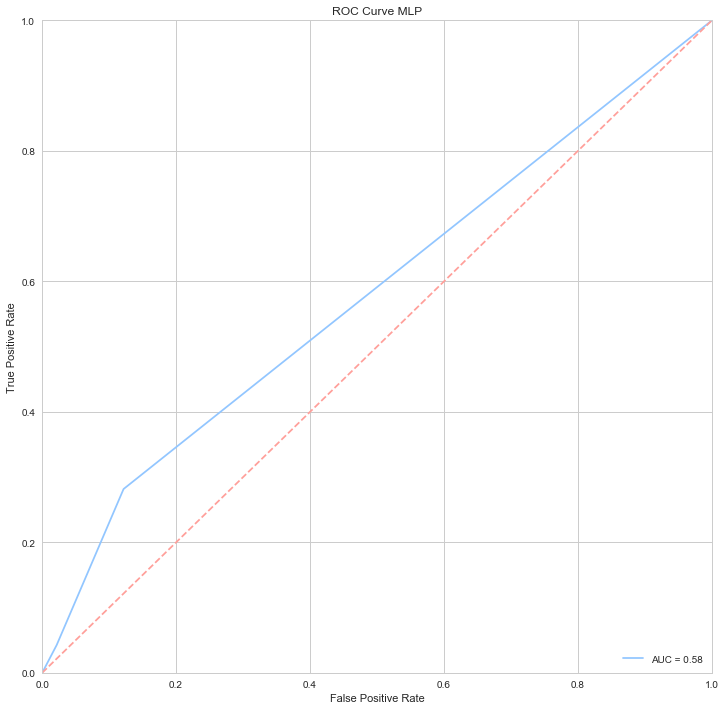

In [761]:
plt.style.use("seaborn-whitegrid")

import matplotlib.pyplot as plt
plt.title('ROC Curve MLP')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.rcParams['figure.figsize'] = 12,12
plt.show()

In [ ]:
pd.crosstab(pd.Series(y_val,name="Actual"),pd.Series(y_val_pred,name="Predicted"),margins=True)

# Random Forrest


In [762]:
clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)
accuracy_score(y_val,pred)


0.69997521992318179

In [722]:
pd.crosstab(pd.Series(y_val,name="Actual"),pd.Series(y_val_pred,name="Predicted"),margins=True)

Predicted,0.0,1.0,2.0,All
Actual,,,,
1.0,10,16,5,31
2.0,492,453,284,1229
All,502,469,289,1260


# SVM


In [776]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_val)


In [777]:
print(accuracy_score(y_val, y_pred))

0.694771403791


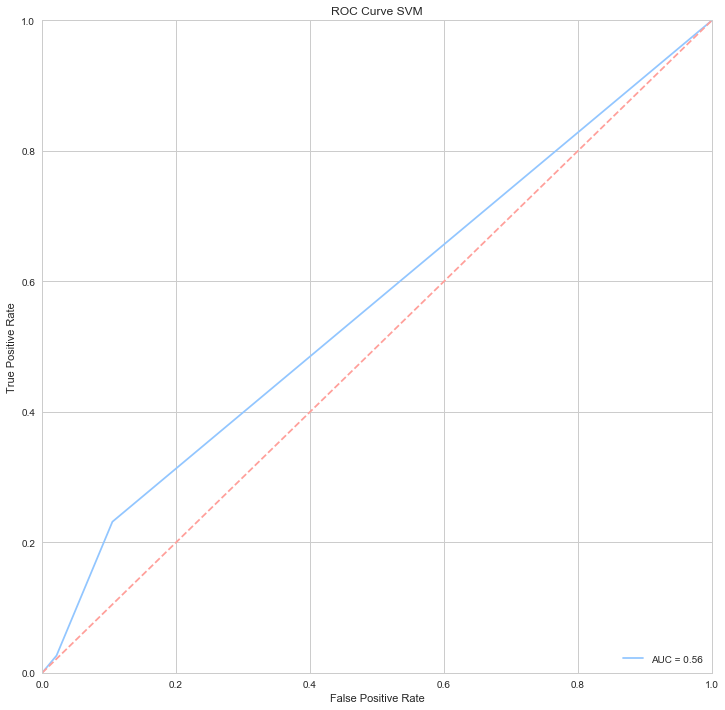

In [780]:
fpr, tpr, threshold = roc_curve(y_val, pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.rcParams['figure.figsize'] = 12,12
plt.show()

In [779]:
#NB
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_val)

# Making the Confusion Matrix
print(accuracy_score(y_val, y_pred))

0.168752323132


In [225]:
#Testing
X_test = df2[['bathrooms','bedrooms','price','no_of_photos','no_of_features','n_words','latitude','longitude']]

In [226]:
y = clf.predict(X_test)
out_df = pd.DataFrame(y)


In [ ]:
#ARTIFICIAL NEURAL NETWORK

In [140]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


Using TensorFlow backend.


In [153]:
#Initialize neural network
classifier = Sequential()

In [143]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [32],
              'epochs': [10],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)


Epoch 1/10
26413/26413 [==============================] - 3s 114us/step - loss: 0.6029 - acc: 0.6763
Epoch 2/10
26413/26413 [==============================] - 2s 82us/step - loss: 0.5286 - acc: 0.6437
Epoch 3/10
26413/26413 [==============================] - 2s 91us/step - loss: 0.5126 - acc: 0.6474
Epoch 4/10
26413/26413 [==============================] - 2s 85us/step - loss: 0.5060 - acc: 0.6504
Epoch 5/10
26413/26413 [==============================] - 2s 82us/step - loss: 0.5009 - acc: 0.6556
Epoch 6/10
26413/26413 [==============================] - 2s 90us/step - loss: 0.4982 - acc: 0.6557
Epoch 7/10
26413/26413 [==============================] - 2s 89us/step - loss: 0.4957 - acc: 0.6578
Epoch 8/10
26413/26413 [==============================] - 2s 89us/step - loss: 0.4940 - acc: 0.6580
Epoch 9/10
26413/26413 [==============================] - 2s 79us/step - loss: 0.4925 - acc: 0.6594
Epoch 10/10
26413/26413 [==============================] - 2s 90us/step - loss: 0.4914 - acc: 0.658

26413/26413 [==============================] - 2s 85us/step - loss: 0.5524 - acc: 0.6491
Epoch 4/10
26413/26413 [==============================] - 2s 87us/step - loss: 0.5476 - acc: 0.6452
Epoch 5/10
26413/26413 [==============================] - 2s 84us/step - loss: 0.5435 - acc: 0.6463
Epoch 6/10
26413/26413 [==============================] - 2s 84us/step - loss: 0.5403 - acc: 0.6461
Epoch 7/10
26413/26413 [==============================] - 2s 85us/step - loss: 0.5378 - acc: 0.6484
Epoch 8/10
26413/26413 [==============================] - 2s 87us/step - loss: 0.5353 - acc: 0.6484
Epoch 9/10
26413/26413 [==============================] - 2s 90us/step - loss: 0.5341 - acc: 0.6460
Epoch 10/10
26413/26413 [==============================] - 2s 83us/step - loss: 0.5328 - acc: 0.6464
Epoch 1/10
26413/26413 [==============================] - 3s 113us/step - loss: 0.6200 - acc: 0.6880
Epoch 2/10
26413/26413 [==============================] - 2s 85us/step - loss: 0.5622 - acc: 0.6571
Epoch 3/1

In [144]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [145]:
best_parameters

{'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}

In [146]:
best_accuracy

0.65340057244105221

In [763]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [267]:
def model(train_X, test_X, train_y, test_y):
    #counter = CountVectorizer()
    #counter.fit(train_job_details)

    #counts_train = counter.transform(train_job_details)
    #counts_test = counter.transform(test_job_details)
    counts_train = train_X
    counts_test = test_X

    KNN_classifier = KNeighborsClassifier()
    LREG_classifier = LogisticRegression()
    DT_classifier = DecisionTreeClassifier()
    MNB_classifier = MultinomialNB()

    predictors = [('mnb', MNB_classifier),('knn', KNN_classifier), ('lreg', LREG_classifier), ('dt', DT_classifier)]

    VT = VotingClassifier(predictors)

    multinomial_grid = [{'alpha': [0, 0.5, 1.0, 1.5, 2.0, 2.5]}]

    # build a grid search to find the best parameters
    gridsearchMNB = GridSearchCV(MNB_classifier, multinomial_grid, cv=5)

    # run the grid search
    gridsearchMNB.fit(counts_train, train_y)
    
    #for params, mean_score, scores in gridsearchMNB.grid_scores_:
    #    print(params, mean_score)

    # =======================================================================================
    # build the parameter grid
    KNN_grid = [{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17], 'weights': ['uniform', 'distance']}]

    # build a grid search to find the best parameters
    gridsearchKNN = GridSearchCV(KNN_classifier, KNN_grid, cv=5)

    # run the grid search
    gridsearchKNN.fit(counts_train, train_y)
    #for params, mean_score, scores in gridsearchKNN.grid_scores_:
    #    print(params, mean_score)

    # =======================================================================================

    # build the parameter grid
    DT_grid = [{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'criterion': ['gini', 'entropy']}]

    # build a grid search to find the best parameters
    gridsearchDT = GridSearchCV(DT_classifier, DT_grid, cv=5)

    # run the grid search
    gridsearchDT.fit(counts_train, train_y)
    #for params, mean_score, scores in gridsearchDT.grid_scores_:
    #    print(params, mean_score)
    # =======================================================================================

    # build the parameter grid
    LREG_grid = [{'C': [0.5, 1, 1.5, 2], 'penalty': ['l1', 'l2']}]

    # build a grid search to find the best parameters
    gridsearchLREG = GridSearchCV(LREG_classifier, LREG_grid, cv=5)
    
    # run the grid search
    gridsearchLREG.fit(counts_train, train_y)
    #for params, mean_score, scores in gridsearchLREG.grid_scores_:
    #    print(params, mean_score)

    # =======================================================================================

    VT.fit(counts_train, train_y)

    # use the VT classifier to predict
    predicted = VT.predict(counts_test)

     
    clf = LogisticRegression(multi_class='multinomial',class_weight='balanced',solver='newton-cg',penalty='l2')

    clf = clf.fit(counts_train, train_y)

    pred = clf.predict(counts_test)

    accuracy = accuracy_score(pred, test_y)

    print('The model accuracy: '+str(accuracy))
    


    #for params, mean_score, scores in gridsearchLREG.grid_scores_:
    #    print(params, mean_score)


    pred_df = pd.DataFrame(pred, columns=["pred"])
    pred_df['actual'] = test_y
    pred_df.to_csv('predLogReg.csv', index=False)
    return pred,clf




In [ ]:
train_X=X_train
test_X = X_val
train_y =y_train
test_y= y_val
print(accuracy_score(y_val, y_pred))

# KNN

In [764]:
KNN_grid = [{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17], 'weights': ['uniform', 'distance']}]

    # build a grid search to find the best parameters
gridsearchKNN = GridSearchCV(KNeighborsClassifier(), KNN_grid, cv=5)

    # run the grid search
gridsearchKNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [744]:
pred=gridsearchKNN.predict(X_val)

In [765]:
print(accuracy_score(y_val, pred))

0.699975219923


In [766]:
from sklearn import metrics
fpr, tpr, threshold = roc_curve(y_val, pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)


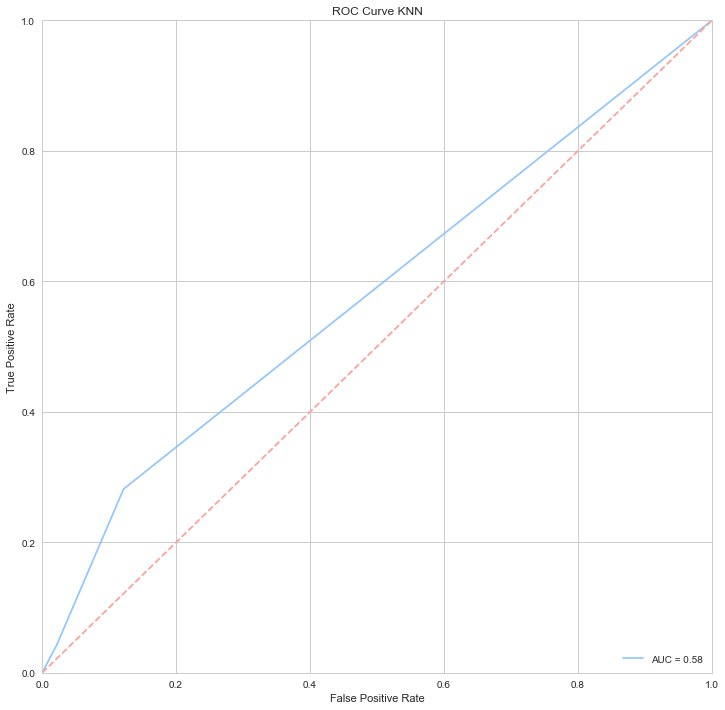

In [767]:
import matplotlib.pyplot as plt
plt.title('ROC Curve KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.rcParams['figure.figsize'] = 12,12
plt.show()

# Decision Tree

In [771]:
DT_grid = [{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'criterion': ['gini', 'entropy']}]

# build a grid search to find the best parameters
gridsearchDT = GridSearchCV(DecisionTreeClassifier(), DT_grid, cv=5)

# run the grid search
gridsearchDT.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [772]:
pred=gridsearchDT.predict(X_val)

In [773]:
print(accuracy_score(y_val, pred))

0.708896047578


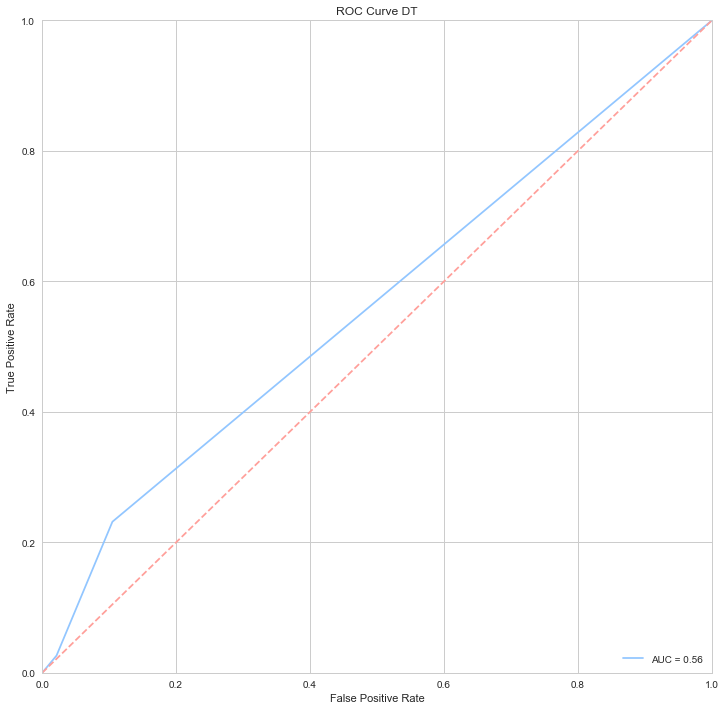

In [774]:
fpr, tpr, threshold = roc_curve(y_val, pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.rcParams['figure.figsize'] = 12,12
plt.show()


# LREG

In [768]:
LREG_grid = [{'C': [0.5, 1, 1.5, 2], 'penalty': ['l1', 'l2']}]
gridsearchLREG = GridSearchCV(LogisticRegression(), LREG_grid, cv=5)
gridsearchLREG.fit(X_train, y_train)
pred=gridsearchLREG.predict(X_val)



In [769]:
print(accuracy_score(y_val, pred))

0.689133936315


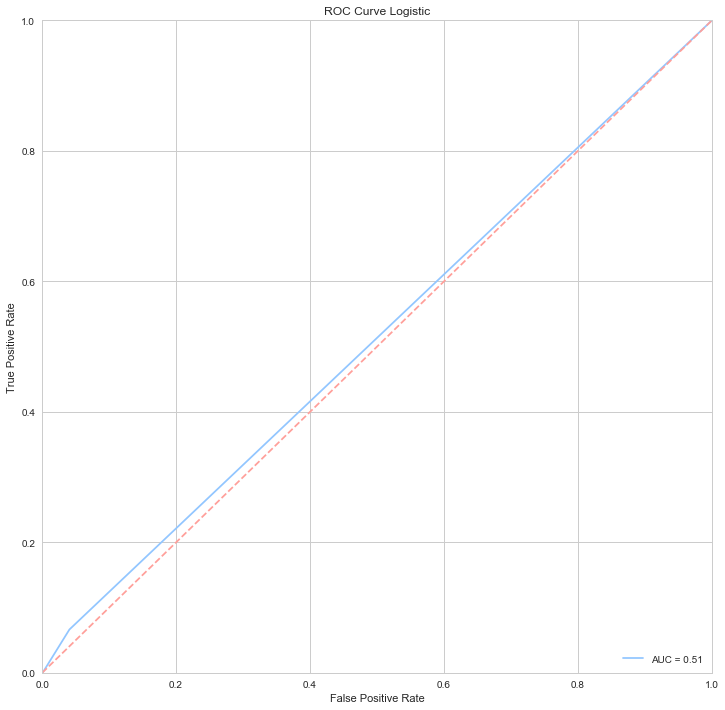

In [770]:
fpr, tpr, threshold = roc_curve(y_val, pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve Logistic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.rcParams['figure.figsize'] = 12,12
plt.show()
